# Introduction

This simulation models a driven pendulum with qaudratic air resistence. Furthermore, it seeks to find conditions for this pendulum system that create chaotic results.

# Physics And Numerical Methods

This system can be described with a 2nd ordered differential equation by applying Newton's second law to the system with x being the arclength of the pendulum from the rest postion and then converting this into radians.
$$F = m \ddot x= -c \dot x^2 - mg\sin\theta + f(t)\Rightarrow mL\ddot \theta = -cL^2\dot \theta^2 - mg\sin \theta + f(t)$$
Further reduction of this equation gives the formula
$$\ddot \theta = - \frac{cL}{m}\dot x^2 - \frac{g}{L} \sin \theta + \frac{1}{mL}f(t)$$
This is equation is not solveable by analytic means and will be tackled numerically using the 4th ordered Runge-Kutta method. Because this method is best suited to solving 1st ordered differential equations, we shall first separate the 2nd ordered differential equation to two first ordered equations.
$$\dot \theta = \omega \quad; \quad \dot \omega = - \frac{cL}{m}\dot x^2 - \frac{g}{L} \sin \theta + \frac{1}{mL}f(t)$$

# Verification

To verify the functionality of our code, we shall examine several special cases. First, $\theta$ vs. $t$ for the undriven damped case looks reasonable. It is a sine wave that decays in a manner that closely resembles exponential decay. In plot of $\theta_{peak}$ vs. $t$, we can see that the decay is actually more pronounced than severe than would be caused by an exponential decay. This is due to the fact that our resistance is qautratic to speed as opposed to linear. Next, the code is able to accurately reproduce the graphics in the handout we recieved in class that plots the difference in phases of two pendulums with slightly different starting postions. Finally, we observe that the amplitude of the pendulum is greatest when the driving frequency is close to the natural frequency of the system.

# Results

See attached code.

# Conclusions

Through experimenting with various configurations and initial conditions of the system I have concluded that the external force required to cause chaotic conditions is much greater than for a linearly damped system with a comparable drag coefficient. I have also observed that the comparative domain of qaudratic drag coefficients that produce chaotic is very narrow. The drag is either so small as to produce little observable effect, or forces the system to oscillate at the driven frequency.

# Program Initialization & Function Creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def extForce(t, A=0, freq=0):
    result = A * np.cos(freq * t)
    return result

In [3]:
def omegaDot(theta, omega, time, m, g, L, c, A=0, freq=0):
    return -(c * L)/(m) * omega**2 * np.sign(omega) - g/L * np.sin(theta) + (1/(m*L))*extForce(time, A, freq)

In [4]:
def omegaDotLin(theta, omega, time, m, g, L, c, A=0, freq=0):
    return -(c)/(m) * omega - g/L * np.sin(theta) + (1/(m*L))*extForce(time, A, freq)

In [5]:
def solve_pendRK4(theta0, omega0, m, g, L, c, till, dt, A=0, freq=0):
    table = np.array([[0., theta0, omega0]])
    i = 0
    while table[i,0] < till:
        ###
        nTime = table[i,0]
        nTheta = table[i,1]
        nOmega = table[i, 2]
        midTime = nTime + dt/2
        endTime = nTime + dt
        ###
        k1Omega = omegaDot(nTheta, nOmega, nTime, m, g, L, c, A, freq)
        k1Theta = nOmega
    
        k2Omega = omegaDot(nTheta + k1Theta *dt/2, nOmega + k1Omega * dt/2, midTime, m, g, L, c, A, freq)
        k2Theta = nOmega + k1Omega * dt/2
    
        k3Theta = nOmega + k2Omega * dt/2
        k3Omega = omegaDot(nTheta + k2Theta * dt/2, nOmega + k2Omega * dt/2, midTime, m, g, L, c, A, freq)
    
        k4Omega = omegaDot(nTheta + k3Theta * dt, nOmega + k3Omega * dt, endTime, m, g, L, c, A, freq)
        k4Theta = nOmega + k3Omega * dt
        ###
        nextTime = endTime
        nextTheta = nTheta + (1/6)*(k1Theta + 2*k2Theta + 2*k3Theta + k4Theta)*(dt)
        nextOmega = nOmega + (1/6)*(k1Omega + 2*k2Omega + 2*k3Omega + k4Omega)*(dt)
        ###
        table = np.append(table, [[nextTime, nextTheta, nextOmega]], axis=0)
        i = i + 1
    return table

In [6]:
def solve_pendRK4Lin(theta0, omega0, m, g, L, c, till, dt, A=0, freq=0):
    table = np.array([[0., theta0, omega0]])
    i = 0
    while table[i,0] < till:
        ###
        nTime = table[i,0]
        nTheta = table[i,1]
        nOmega = table[i, 2]
        midTime = nTime + dt/2
        endTime = nTime + dt
        ###
        k1Omega = omegaDotLin(nTheta, nOmega, nTime, m, g, L, c, A, freq)
        k1Theta = nOmega
    
        k2Omega = omegaDotLin(nTheta + k1Theta *dt/2, nOmega + k1Omega * dt/2, midTime, m, g, L, c, A, freq)
        k2Theta = nOmega + k1Omega * dt/2
    
        k3Theta = nOmega + k2Omega * dt/2
        k3Omega = omegaDotLin(nTheta + k2Theta * dt/2, nOmega + k2Omega * dt/2, midTime, m, g, L, c, A, freq)
    
        k4Omega = omegaDotLin(nTheta + k3Theta * dt, nOmega + k3Omega * dt, endTime, m, g, L, c, A, freq)
        k4Theta = nOmega + k3Omega * dt
        ###
        nextTime = endTime
        nextTheta = nTheta + (1/6)*(k1Theta + 2*k2Theta + 2*k3Theta + k4Theta)*(dt)
        nextOmega = nOmega + (1/6)*(k1Omega + 2*k2Omega + 2*k3Omega + k4Omega)*(dt)
        ###
        table = np.append(table, [[nextTime, nextTheta, nextOmega]], axis=0)
        i = i + 1
    return table

In [7]:
def modResults(inputArray):
    N = len(inputArray[:,0])
    i = 0
    while i < N:
        if inputArray[i, 1] > 2*np.pi:
            j = i
            while j < N:
                inputArray[j, 1] = inputArray[j,1] - 2*np.pi
                j = j + 1
        if inputArray[i, 1] < -2*np.pi:
            j = i
            while j < N:
                inputArray[j, 1] = inputArray[j,1] + 2*np.pi
                j = j + 1
        i = i + 1
    return inputArray

In [8]:
def findPeaks(inputArray):
    times = np.array([])
    peaks = np.array([])
    N = len(inputArray[:,0])
    i = 1
    while i < N:
        if i == 1:
            if inputArray[i,1] < inputArray[i-1, 1]:
                times = np.append(times, inputArray[i-1, 0])
                peaks = np.append(peaks, inputArray[i-1, 1])
        if i > 1:
            if inputArray[i,1] < inputArray[i-1, 1] and inputArray[i-1,1] > inputArray[i-2,1] and inputArray[i+1,1] < inputArray[i, 1]:
                times = np.append(times, inputArray[i-1, 0])
                peaks = np.append(peaks, inputArray[i-1, 1])
        i = i + 1
    return times, peaks

In [9]:
def makePlots1(theta0, omega0, m, g, L, c, till, dt, A=0, freq=0):
    rk4Results = solve_pendRK4(theta0, omega0, m, g, L, c, till, dt, A, freq)
    rk4Results = modResults(rk4Results)
    peakTimes, peakThetas = findPeaks(rk4Results)
    
    plt.figure()
    plt.plot(rk4Results[:,0], rk4Results[:,1], 'b-', peakTimes, peakThetas, 'ro')
    plt.title('$\\theta $ vs. Time', size="large")
    plt.xlabel("Time (s)", size="large")
    plt.ylabel('$\\theta $ (rads)', size="large")
    plt.show
    
    plt.figure()
    plt.plot(rk4Results[:,0], rk4Results[:,2])
    plt.title('$\\omega $ vs Time', size="large")
    plt.xlabel('Time (s)', size="large")
    plt.ylabel('$\\omega $ (rads/s)', size="large")
    plt.show()
    
    plt.figure()
    plt.plot(rk4Results[:,1], rk4Results[:,2])
    plt.title('$\\omega $ vs. $\\theta$', size="large")
    plt.xlabel('$\\theta $ (rads)', size="large")
    plt.ylabel('$\\omega $ (rads/s)', size="large")
    plt.show

# Damped Undriven Oscillator

### Plot $\theta(t)$ , $\omega(t)$, and phasespace. Isolate occurances $( t,  \theta_{localmax})$.

In [10]:
thetaInit = 1.5
omegaInit = 0
m = .15
g = 10.
L = 1.
c = .12
endTime = 10 * 2 * np.pi / (g/L)**(1/2)
dt = .001

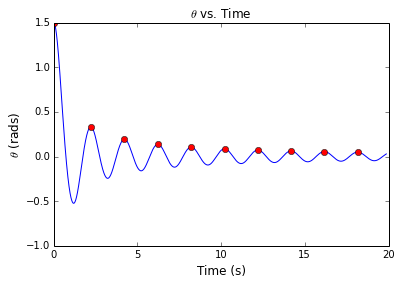

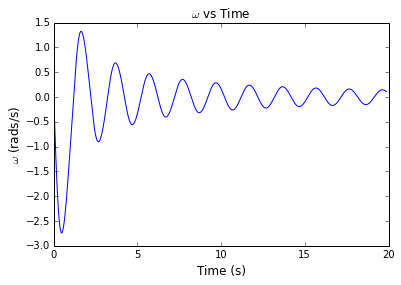

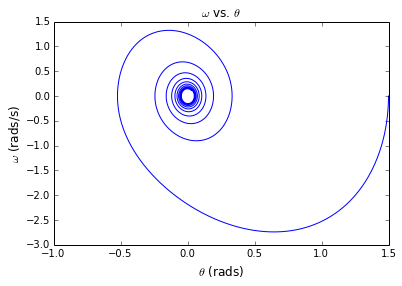

In [11]:
makePlots1(thetaInit, omegaInit, m, g, L, c, endTime, dt)

### Plot $\theta_{max}(i)$ vs $t(i)$ for several dampening coefficients. Make this plot a semi-log plot.

In [12]:
b1results = solve_pendRK4(thetaInit, omegaInit, m, g, L, .0012, endTime, dt)
b1results = findPeaks(b1results)

b2results = solve_pendRK4(thetaInit, omegaInit, m, g, L, .012, endTime, dt)
b2results = findPeaks(b2results)

b3results = solve_pendRK4(thetaInit, omegaInit, m, g, L, .12, endTime, dt)
b3results = findPeaks(b3results)

b4results = solve_pendRK4(thetaInit, omegaInit, m, g, L, 1.2, endTime, dt)
b4results = findPeaks(b4results)

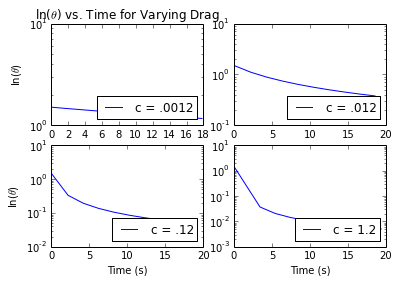

In [13]:
plt.subplot(221)
plt.semilogy(b1results[0], b1results[1], label="c = .0012")
plt.title("ln($\\theta$) vs. Time for Varying Drag")
plt.ylabel("ln($\\theta$)")
plt.legend(loc=4)

plt.subplot(222)
plt.semilogy(b2results[0], b2results[1], label="c = .012")
plt.legend(loc=4)

plt.subplot(223)
plt.semilogy(b3results[0], b3results[1], label="c = .12")
plt.ylabel("ln($\\theta$)")
plt.xlabel("Time (s)")
plt.legend(loc=4)

plt.subplot(224)
plt.semilogy(b4results[0], b4results[1], label="c = 1.2")
plt.xlabel("Time (s)")
plt.legend(loc=4)

plt.show()

In the case of linear dampening the decay of the peak values is known to be exponential. If graphed in a fashion similiar to that above, it would always produce a straight line. In our case, the qaudratically damped one, we see that increasing the coefficient of drag produces a decay that is more pronounced than exponential decay. This seems reasonable.

# The Driven Damped Oscillator

### Make a plot of a pendulum system with several different driving frequency values.

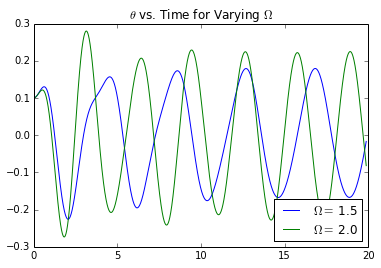

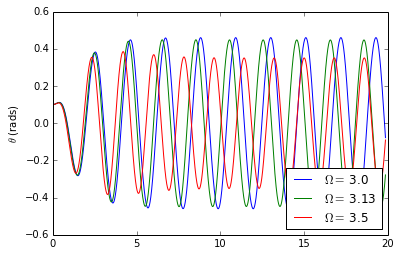

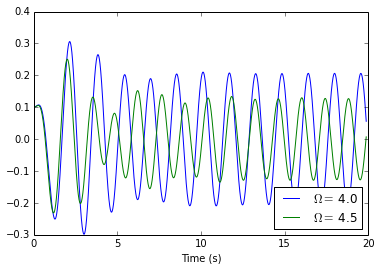

In [14]:
thetaInit = .1
omegaInit = 0
a = .2
freqs = [1.5, 2., 3., 3.13, 3.5, 4., 4.5]

solutions1 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[0])
solutions1 = modResults(solutions1)

solutions2 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[1])
solutions2 = modResults(solutions2)

solutions3 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[2])
solutions3 = modResults(solutions3)

solutions4 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[3])
solutions4 = modResults(solutions4)

solutions5 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[4])
solutions5 = modResults(solutions5)

solutions6 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[5])
solutions6 = modResults(solutions6)

solutions7 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A=a, freq=freqs[6])
solutions7 = modResults(solutions7)


plt.figure()
plt.plot(solutions1[:,0], solutions1[:,1], label='$\\Omega =$ 1.5')
plt.plot(solutions2[:,0], solutions2[:,1], label='$\\Omega =$ 2.0')
plt.title('$\\theta$ vs. Time for Varying $\\Omega$')
plt.legend(loc=4)

plt.figure()
plt.plot(solutions3[:,0], solutions3[:,1], label='$\\Omega =$ 3.0')
plt.plot(solutions4[:,0], solutions4[:,1], label='$\\Omega =$ 3.13')
plt.plot(solutions5[:,0], solutions5[:,1], label='$\\Omega =$ 3.5')
plt.ylabel("$\\theta$ (rads)")
plt.legend(loc=4)

plt.figure()
plt.plot(solutions6[:,0], solutions6[:,1], label='$\\Omega =$ 4.0')
plt.plot(solutions7[:,0], solutions7[:,1], label='$\\Omega =$ 4.5')
plt.xlabel("Time (s)")
plt.legend(loc=4)

# Inducing chaotic behaviour

### Experiment with initial conditions until you induce a chaotic state. Plot $\theta(t)$ and phase space.

In [15]:
thetaInit = .2
omegaInit = 0
m = .15
g = 10.
L = 10.
c =  .08* m /L
endTime = 120/ (g/L)**(1/2)
dt = .04
A =  .45 * m * L
freq =  .66

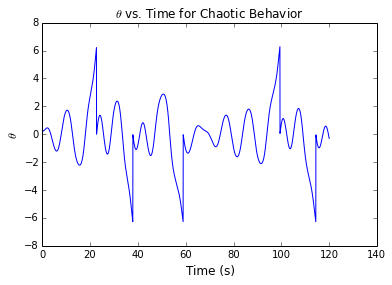

In [16]:
chaosResults = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
chaosResults = modResults(chaosResults)

plt.figure()
plt.plot(chaosResults[:,0], chaosResults[:,1])
plt.title("$\\theta$ vs. Time for Chaotic Behavior", size="large")
plt.xlabel("Time (s)", size="large")
plt.ylabel("$\\theta$", size="large")

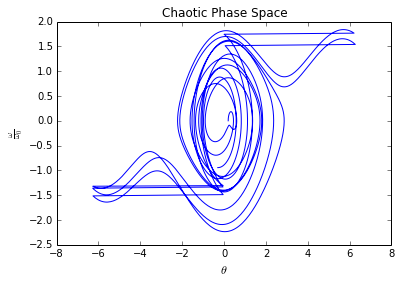

In [17]:
plt.figure()
plt.plot(chaosResults[:,1], chaosResults[:,2]/ (g/L)**(1/2))
plt.title("Chaotic Phase Space")
plt.xlabel("$\\theta$", size="large")
plt.ylabel("$\\frac{\\omega}{\\omega_{0}}$", size="large")

# Lyaponov Exponent

### Recreate figure 3.7 from the hand out. Include linear dampening.

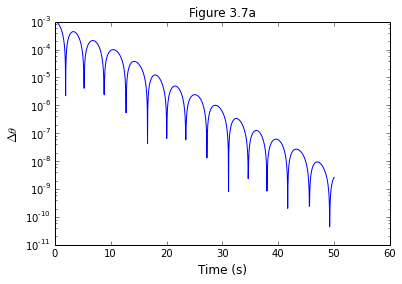

In [18]:
thetaInit = .2
omegaInit = 0
m = .15
g = 10.
L = 10.
c =  .5 * m
endTime = 50/ (g/L)**(1/2)
dt = .04
A =  .5 * m * L
freq =  .66

lyap1 = solve_pendRK4Lin(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
lyap1 = modResults(lyap1)

thetaInit = thetaInit + .001
lyap2 = solve_pendRK4Lin(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
chaosResults = modResults(lyap2)

lyapFinal = abs(lyap1[:,1] - lyap2[:,1])

plt.figure()
plt.semilogy(lyap1[:,0], lyapFinal)
plt.title("Figure 3.7a", size="large")
plt.xlabel("Time (s)", size="large")
plt.ylabel("$\\Delta \\theta$", size="large")

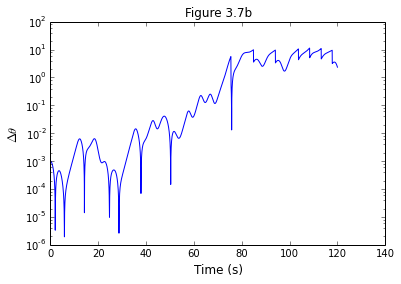

In [19]:
thetaInit = .2
omegaInit = 0
m = .15
g = 10.
L = 10.
c =  .5 * m
endTime = 120/ (g/L)**(1/2)
dt = .04
A =  1.2 * m * L
freq =  .66

lyap1 = solve_pendRK4Lin(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
lyap1 = modResults(lyap1)

thetaInit = thetaInit + .001
lyap2 = solve_pendRK4Lin(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
chaosResults = modResults(lyap2)

lyapFinal = abs(lyap1[:,1] - lyap2[:,1])

plt.figure()
plt.semilogy(lyap1[:,0], lyapFinal)
plt.title("Figure 3.7b", size="large")
plt.xlabel("Time (s)", size="large")
plt.ylabel("$\\Delta \\theta$", size="large")

### Create a figure, in the spirit of the previous ones, that compares the difference in $\theta$ between two similiar, qaudratically-damped pendulums with slightly different starting positions that go to the chaotic state found above. If the difference goes to zero, the pendulum will always tend toward the same endstate, regardless of the initial conditions.

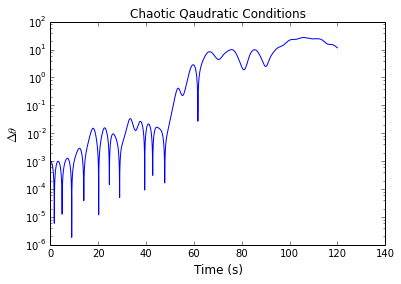

In [20]:
thetaInit = .2
omegaInit = 0
m = .15
g = 10.
L = 10.
c =  .08* m /L
endTime = 120/ (g/L)**(1/2)
dt = .04
A =  .45 * m * L
freq =  .66

lyap1 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)


thetaInit = thetaInit + .001
lyap2 = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)


lyapFinal = abs(lyap1[:,1] - lyap2[:,1])

plt.figure()
plt.semilogy(lyap1[:,0], lyapFinal)
plt.title("Chaotic Qaudratic Conditions", size="large")
plt.xlabel("Time (s)", size="large")
plt.ylabel("$\\Delta \\theta$", size="large")

# An attractive phase space. Driven, undamped pendulum.

Unrelated to project.

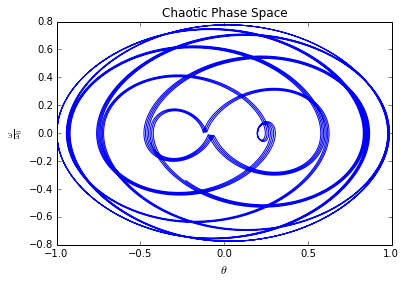

In [23]:
thetaInit = .2
omegaInit = 0
m = .15
g = 10.
L = 10.
c =  0.
endTime = 240
dt = .04
A =  .3 * m * L
freq =  .66

chaosResults = solve_pendRK4(thetaInit, omegaInit, m, g, L, c, endTime, dt, A, freq)
chaosResults = modResults(chaosResults)

plt.figure()
plt.plot(chaosResults[:,1], chaosResults[:,2]/ (g/L)**(1/2))
plt.title("Chaotic Phase Space")
plt.xlabel("$\\theta$", size="large")
plt.ylabel("$\\frac{\\omega}{\\omega_{0}}$", size="large")